Adicionar a folder no seu drive

https://drive.google.com/drive/folders/1Q3q47u4J2zfSX-jJCmBJ3GfPg84gcT_g?usp=sharing

Base de dados:

https://www.kaggle.com/olistbr/brazilian-ecommerce/version/5

In [ ]:
#Vai pedir pra você autenticar no drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.base import TransformerMixin
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from collections import Counter
import itertools
import numpy as np
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support, auc, roc_curve
from sklearn.pipeline import Pipeline
import pickle


https://www.kaggle.com/olistbr/brazilian-ecommerce/version/5?select=olist_public_dataset_v2.csv

In [ ]:
path = "/content/drive/My Drive/Data Maneiros/Data_mining/olist_ecommerce/v5"

In [ ]:
# ord_pay = pd.read_csv(path + "/olist_order_payments_dataset.csv")
# ord_items = pd.read_csv(path + "/olist_order_items_dataset.csv")
# ord_review = pd.read_csv(path + "/olist_order_reviews_dataset.csv")
# ord = pd.read_csv(path + "/olist_orders_dataset.csv")
# products = pd.read_csv(path + "/olist_products_dataset.csv")
# sellers = pd.read_csv(path + "/olist_sellers_dataset.csv")
# prod_cat_trans = pd.read_csv(path + "/product_category_name_translation.csv")
# geoloc = pd.read_csv(path + "/olist_geolocation_dataset.csv")
# customers = pd.read_csv(path + "/olist_customers_dataset.csv")
data = pd.read_csv(path + "/olist_public_dataset_v2.csv")
# olist_public_dataset_v2.csv

In [ ]:
olist = data.copy()

In [ ]:
olist.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [ ]:
olist.shape

(100000, 25)

#An EDA checklist
##1. What question(s) are you trying to solve (or prove wrong)?
##2. What kind of data do you have and how do you treat different types?
##3. What’s missing from the data and how do you deal with it?
##4. Where are the outliers and why should you care about them?
##5. How can you add, change or remove features to get more out of your data?

# Qual o problema?

## Reviews negativos impedem a retenção de clientes por parte das empresas



# Informacao dos dados

In [ ]:
olist.describe()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,review_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000
mean,129.191704,21.739202,1.100090,1.141690,353.768400,48.839630,779.020710,2.2781,4.054110
std,194.863060,20.088368,0.459189,0.708829,297.682699,10.139335,665.387848,1.7495,1.363591
min,2.000000,0.000000,1.000000,1.000000,10.000000,5.000000,8.000000,1.0000,1.000000
25%,46.990000,13.470000,1.000000,1.000000,116.000000,42.000000,340.000000,1.0000,4.000000
50%,83.650000,16.790000,1.000000,1.000000,250.000000,52.000000,591.000000,2.0000,5.000000
75%,145.900000,23.010000,1.000000,1.000000,590.000000,57.000000,978.000000,3.0000,5.000000
max,13440.000000,1562.100000,20.000000,30.000000,999.000000,72.000000,3992.000000,20.0000,5.000000


Os dados numericos devem ser normalizados pois possuem escalas muito diferentes

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   order_status                   100000 non-null  object 
 2   order_products_value           100000 non-null  float64
 3   order_freight_value            100000 non-null  float64
 4   order_items_qty                100000 non-null  int64  
 5   order_sellers_qty              100000 non-null  int64  
 6   order_purchase_timestamp       100000 non-null  object 
 7   order_aproved_at               99982 non-null   object 
 8   order_estimated_delivery_date  100000 non-null  object 
 9   order_delivered_customer_date  97595 non-null   object 
 10  customer_id                    100000 non-null  object 
 11  customer_city                  100000 non-null  object 
 12  customer_state                 

Mudar para datetime

 6   order_purchase_timestamp       100000 non-null  object 

 7   order_aproved_at               99982 non-null   object 

 8   order_estimated_delivery_date  100000 non-null  object 

 9   order_delivered_customer_date  97595 non-null   object 

 Mudar para objeto 

 customer_zip_code_prefix

 Retirar

  15  product_name_lenght            100000 non-null  int64  

 16  product_description_lenght     100000 non-null  int64  

 17  product_photos_qty             100000 non-null  int64  

  21  review_comment_title           8262 non-null    object 
  
 22  review_comment_message         42489 non-null   object 

In [ ]:
olist['order_purchase_timestamp'] = pd.to_datetime(olist['order_purchase_timestamp']).dt.date
olist['order_aproved_at'] = pd.to_datetime(olist['order_aproved_at']).dt.date
olist['order_estimated_delivery_date'] = pd.to_datetime(olist['order_estimated_delivery_date']).dt.date
olist['order_delivered_customer_date'] = pd.to_datetime(olist['order_delivered_customer_date']).dt.date

In [ ]:
olist.isna().sum()

order_id                             0
order_status                         0
order_products_value                 0
order_freight_value                  0
order_items_qty                      0
order_sellers_qty                    0
order_purchase_timestamp             0
order_aproved_at                    18
order_estimated_delivery_date        0
order_delivered_customer_date     2405
customer_id                          0
customer_city                        0
customer_state                       0
customer_zip_code_prefix             0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_id                           0
review_id                            0
review_score                         0
review_comment_title             91738
review_comment_message           57511
review_creation_date                 0
review_answer_timestamp              0
dtype: int64

Possuem dados nulos:

order_aproved_at 

order_delivered_customer_date    

review_comment_title           

review_comment_message


# Selecao de features

Iremos retirar a coluna _customer_city_ pois a amostra de cada dados pra cada cidade nao é suficiente para chegarmos em uma conclusao, iremos utilizar apenas os dados refentes aos estados

'product_name_lenght' 'product_description_lenght' 'product_id'	'review_id' 'review_creation_date'	'review_answer_timestamp' 'customer_id' 'order_id' 'review_comment_title' 'review_comment_message'
'customer_city'	'customer_zip_code_prefix' 'order_purchase_timestamp'

In [ ]:
olist.drop(columns=['review_comment_title'], axis=1, inplace=True)
olist.drop(columns=['review_comment_message'], axis=1, inplace=True)
# olist.drop(columns=['order_id', 'order_purchase_timestamp', 'customer_id', 'customer_city', 'customer_zip_code_prefix', 
#        'product_name_lenght', 'product_description_lenght',
#        'product_id', 'review_id','review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)
olist.drop(columns=['order_id', 'customer_id', 'customer_city', 'customer_zip_code_prefix', 
       'product_name_lenght', 'product_description_lenght',
       'product_id', 'review_id','review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)

In [ ]:
olist.columns

Index(['order_status', 'order_products_value', 'order_freight_value',
       'order_items_qty', 'order_sellers_qty', 'order_purchase_timestamp',
       'order_aproved_at', 'order_estimated_delivery_date',
       'order_delivered_customer_date', 'customer_state',
       'product_category_name', 'product_photos_qty', 'review_score'],
      dtype='object')

In [ ]:
olist.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score
0,delivered,349.90,13.84,1,1,2017-01-31,2017-02-01,2017-03-15,2017-02-06,PR,beleza_saude,1,5
1,delivered,15.00,15.10,1,1,2017-09-09,2017-09-10,2017-10-02,2017-09-13,MG,informatica_acessorios,2,5
2,delivered,238.90,18.00,1,1,2017-01-30,2017-01-30,2017-03-07,2017-02-06,SP,automotivo,1,5
3,delivered,29.99,18.23,1,1,2018-03-11,2018-03-11,2018-04-03,2018-04-03,GO,cama_mesa_banho,1,4
4,delivered,295.99,47.65,1,1,2017-04-20,2017-04-25,2017-05-24,2017-05-04,PE,moveis_decoracao,2,5


In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   100000 non-null  object 
 1   order_products_value           100000 non-null  float64
 2   order_freight_value            100000 non-null  float64
 3   order_items_qty                100000 non-null  int64  
 4   order_sellers_qty              100000 non-null  int64  
 5   order_purchase_timestamp       100000 non-null  object 
 6   order_aproved_at               99982 non-null   object 
 7   order_estimated_delivery_date  100000 non-null  object 
 8   order_delivered_customer_date  97595 non-null   object 
 9   customer_state                 100000 non-null  object 
 10  product_category_name          100000 non-null  object 
 11  product_photos_qty             100000 non-null  int64  
 12  review_score                   

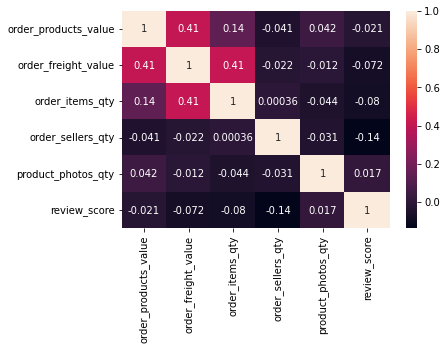

In [ ]:
corrMatrix = olist.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
olist.describe()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_photos_qty,review_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000
mean,129.191704,21.739202,1.100090,1.141690,2.2781,4.054110
std,194.863060,20.088368,0.459189,0.708829,1.7495,1.363591
min,2.000000,0.000000,1.000000,1.000000,1.0000,1.000000
25%,46.990000,13.470000,1.000000,1.000000,1.0000,4.000000
50%,83.650000,16.790000,1.000000,1.000000,2.0000,5.000000
75%,145.900000,23.010000,1.000000,1.000000,3.0000,5.000000
max,13440.000000,1562.100000,20.000000,30.000000,20.0000,5.000000


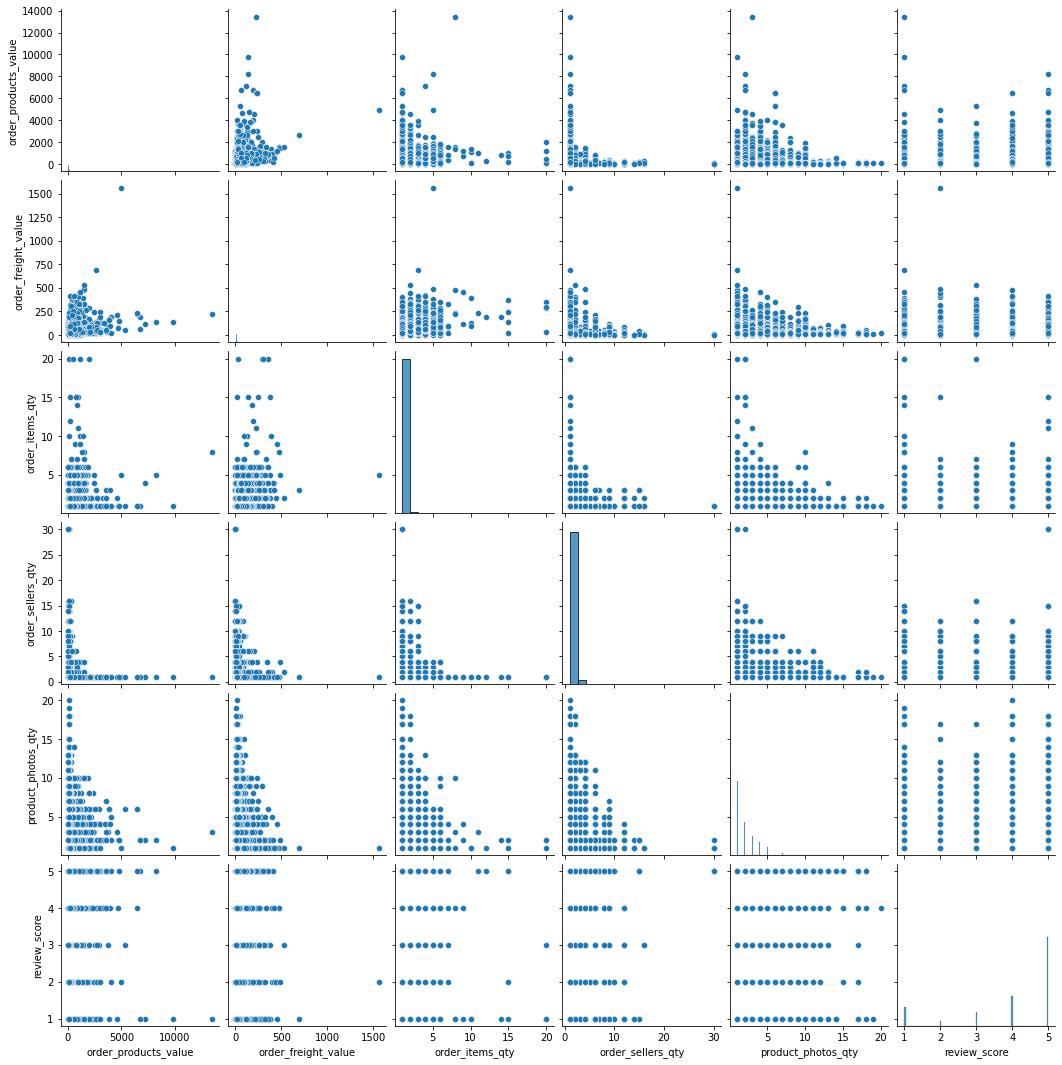

In [ ]:
sns.pairplot(olist)

# Perguntas


Qual categoria tem mais review?

Qual categoria com melhor avaliação?

O tempo de entrega afeta a nota?

Média das notas por estados ou cidades
- Por que?

Qual influência do valor do pedido com a nota dada? /
Qual ticket médio para cada faixa de nota?

Qual porcentagem de notas baixas para entregas atrasadas?



# Respondendo as perguntas

## Qual categoria tem mais review?

product_category_name	

review score

In [ ]:
olist.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score
0,delivered,349.90,13.84,1,1,2017-01-31,2017-02-01,2017-03-15,2017-02-06,PR,beleza_saude,1,5
1,delivered,15.00,15.10,1,1,2017-09-09,2017-09-10,2017-10-02,2017-09-13,MG,informatica_acessorios,2,5
2,delivered,238.90,18.00,1,1,2017-01-30,2017-01-30,2017-03-07,2017-02-06,SP,automotivo,1,5
3,delivered,29.99,18.23,1,1,2018-03-11,2018-03-11,2018-04-03,2018-04-03,GO,cama_mesa_banho,1,4
4,delivered,295.99,47.65,1,1,2017-04-20,2017-04-25,2017-05-24,2017-05-04,PE,moveis_decoracao,2,5


In [ ]:
top_cat_rev = olist.groupby(by='product_category_name')[['review_score']].count().sort_values(by='review_score', ascending=False)[:10].reset_index()
top_cat_rev.columns

Index(['product_category_name', 'review_score'], dtype='object')

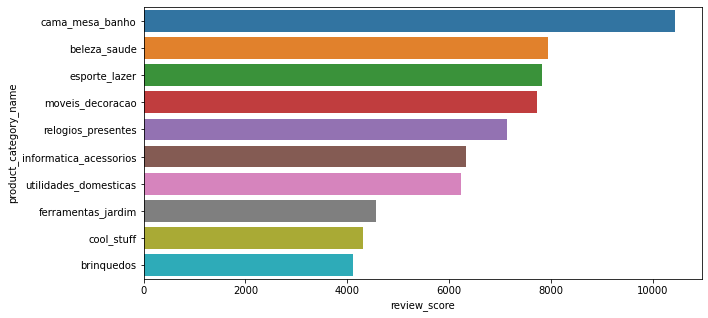

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y= top_cat_rev.product_category_name, x=top_cat_rev.review_score)

## Qual categoria com melhor avaliação?


In [ ]:
best_cat_rev = olist.groupby(by='product_category_name')[['review_score']].mean().sort_values(by='review_score', ascending=False)[:5].reset_index()


In [ ]:
best_cat_rev

,product_category_name,review_score
0,cds_dvds_musicais,4.833333
1,fraldas_higiene,4.692308
2,cine_foto,4.500000
3,livros_interesse_geral,4.454128
4,artes,4.420455


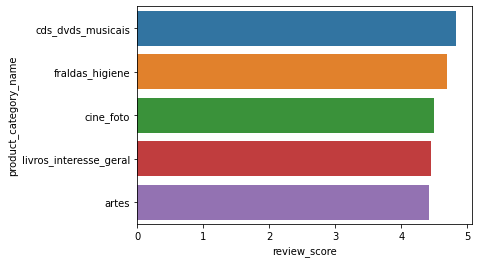

In [ ]:
sns.barplot(y= best_cat_rev.product_category_name, x=best_cat_rev.review_score)

## Qual categoria com pior avaliação?

In [ ]:
worst_cat_rev = olist.groupby(by='product_category_name')[['review_score']].mean().sort_values(by='review_score', ascending=True)[:5].reset_index()

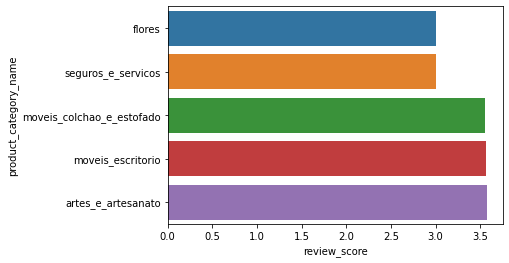

In [ ]:
sns.barplot(y= worst_cat_rev.product_category_name, x=worst_cat_rev.review_score)

In [ ]:
olist.groupby(by='product_category_name')[['review_score']].count().describe()

,review_score
count,71.000000
mean,1408.450704
std,2406.595442
min,2.000000
25%,62.500000
50%,223.000000
75%,1686.000000
max,10435.000000


## Selecionando apenas as categorias com quantidade de reviews maior que o percentil de 50%

In [ ]:
relevant_reviews = olist.groupby(by='product_category_name')[['review_score']].count()[olist.groupby(by='product_category_name')[['review_score']].count() > 223].dropna().sort_values(by='review_score',ascending=False).reset_index()

In [ ]:
relevant_reviews.shape

(35, 2)

In [ ]:
relevant_reviews

,product_category_name,review_score
0,cama_mesa_banho,10435.0
1,beleza_saude,7939.0
2,esporte_lazer,7832.0
3,moveis_decoracao,7728.0
4,relogios_presentes,7130.0
5,informatica_acessorios,6329.0
6,utilidades_domesticas,6230.0
7,ferramentas_jardim,4570.0
8,cool_stuff,4315.0
9,brinquedos,4114.0


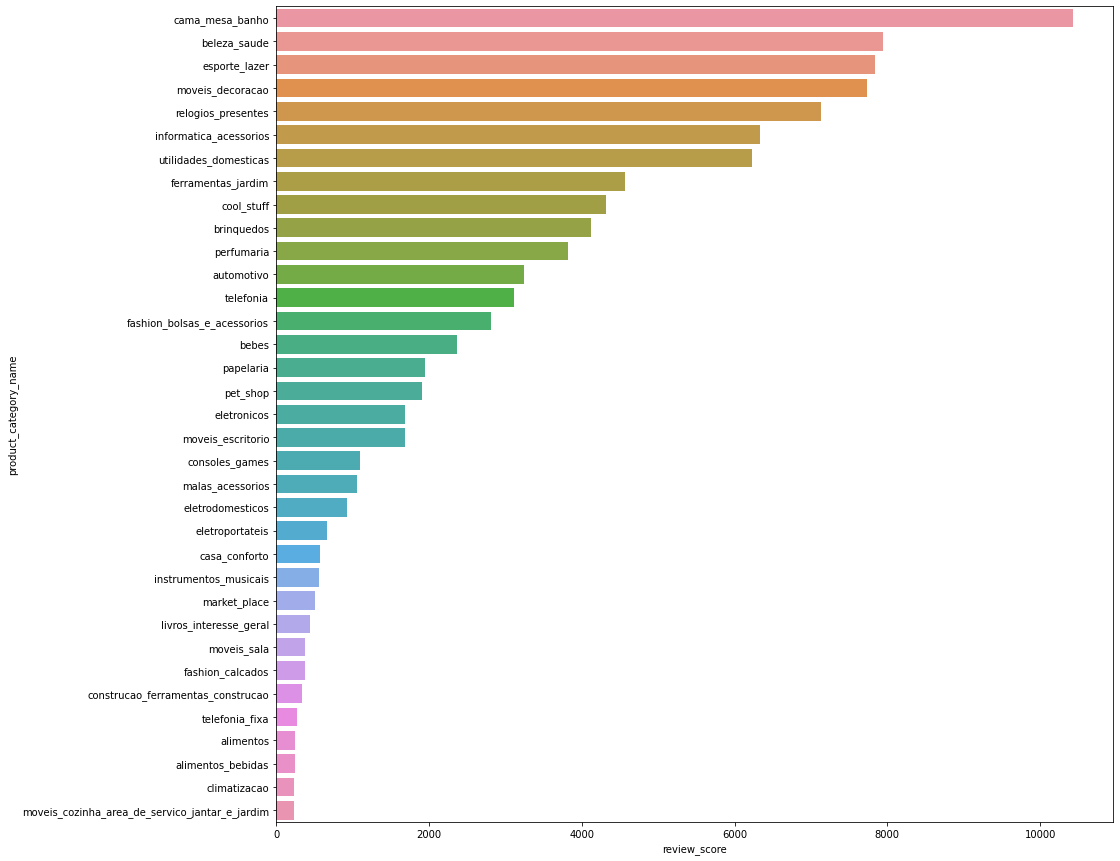

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(data=relevant_reviews, y='product_category_name', x='review_score')

# Avaliação das categorias que estão acima do percentil 50

In [ ]:
list_relevants = list(relevant_reviews.product_category_name)

In [ ]:
relevant_rev = olist.loc[olist['product_category_name'].isin(list_relevants)][['product_category_name', 'review_score']]

In [ ]:
best_relevant_rev = relevant_rev.groupby(by='product_category_name')[['review_score']].mean().sort_values(by='review_score', ascending=False).reset_index()


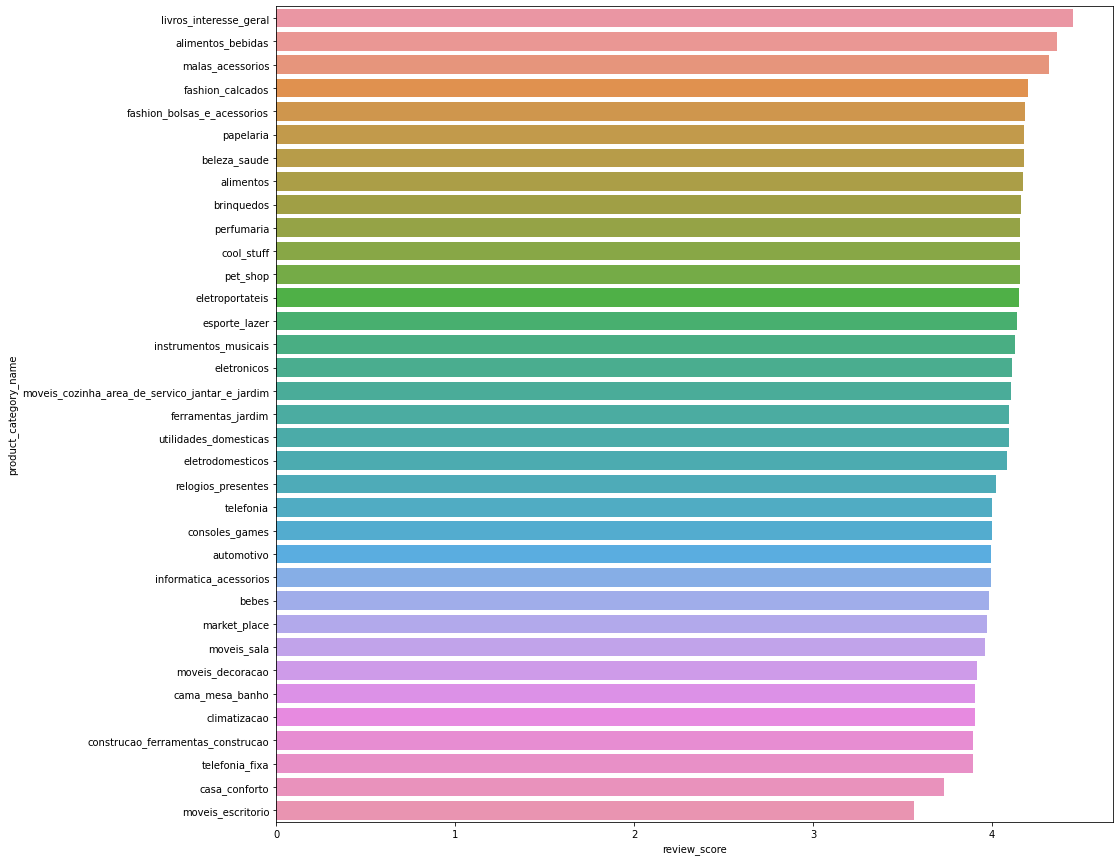

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(data = best_relevant_rev, y= 'product_category_name', x='review_score')

## O tempo de entrega afeta a nota?

In [ ]:
olist['order_estimated_delivery_date'] - olist['order_aproved_at']

0       42 days
1       22 days
2       36 days
3       23 days
4       29 days
          ...  
99995   27 days
99996   19 days
99997   25 days
99998   20 days
99999   31 days
Length: 100000, dtype: timedelta64[ns]

In [ ]:
olist['order_delivered_customer_date']- olist['order_aproved_at']

0        5 days
1        3 days
2        7 days
3       23 days
4        9 days
          ...  
99995    7 days
99996    9 days
99997   14 days
99998    7 days
99999   11 days
Length: 100000, dtype: timedelta64[ns]

In [ ]:
late_delivery = olist.copy()
late_delivery["dif_dias"] = late_delivery['order_estimated_delivery_date'] - late_delivery['order_delivered_customer_date']
late_delivery

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score,dif_dias
0,delivered,349.90,13.84,1,1,2017-01-31,2017-02-01,2017-03-15,2017-02-06,PR,beleza_saude,1,5,37 days
1,delivered,15.00,15.10,1,1,2017-09-09,2017-09-10,2017-10-02,2017-09-13,MG,informatica_acessorios,2,5,19 days
2,delivered,238.90,18.00,1,1,2017-01-30,2017-01-30,2017-03-07,2017-02-06,SP,automotivo,1,5,29 days
3,delivered,29.99,18.23,1,1,2018-03-11,2018-03-11,2018-04-03,2018-04-03,GO,cama_mesa_banho,1,4,0 days
4,delivered,295.99,47.65,1,1,2017-04-20,2017-04-25,2017-05-24,2017-05-04,PE,moveis_decoracao,2,5,20 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,delivered,198.00,91.98,2,1,2017-10-02,2017-10-04,2017-10-31,2017-10-11,BA,ferramentas_jardim,1,5,20 days
99996,delivered,59.00,11.02,1,1,2017-03-22,2017-03-22,2017-04-10,2017-03-31,SP,telefonia,1,5,10 days
99997,delivered,119.99,18.09,1,1,2017-06-10,2017-06-10,2017-07-05,2017-06-24,SP,esporte_lazer,1,5,11 days
99998,delivered,119.99,18.09,1,1,2017-09-12,2017-09-12,2017-10-02,2017-09-19,MG,cool_stuff,1,1,13 days


In [ ]:
late_delivery = late_delivery[late_delivery['dif_dias'].dt.days < 0]

In [ ]:
late_delivery['dif_dias'] = late_delivery['dif_dias'].dt.days.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
late_delivery

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score,dif_dias
26,delivered,134.90,38.08,1,1,2018-02-24,2018-02-24,2018-03-22,2018-04-23,TO,brinquedos,4,1,-32
42,delivered,170.00,21.68,1,1,2017-11-24,2017-11-24,2017-12-20,2018-01-19,DF,relogios_presentes,2,1,-30
88,delivered,53.90,19.80,1,3,2018-05-03,2018-05-04,2018-06-12,2018-06-20,PA,ferramentas_jardim,2,2,-8
107,delivered,59.90,17.67,1,1,2017-11-22,2017-11-22,2017-12-11,2017-12-18,ES,ferramentas_jardim,2,2,-7
116,delivered,975.00,28.76,1,1,2017-04-08,2017-04-08,2017-05-12,2017-05-16,AL,relogios_presentes,3,1,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99775,delivered,159.00,48.55,1,1,2017-12-03,2017-12-03,2018-01-05,2018-01-09,MA,beleza_saude,1,1,-4
99857,delivered,35.90,16.60,1,1,2017-11-24,2017-11-24,2017-12-15,2017-12-16,DF,beleza_saude,1,5,-1
99881,delivered,29.60,20.40,1,1,2018-03-06,2018-03-06,2018-04-13,2018-04-20,PA,utilidades_domesticas,1,1,-7
99894,delivered,52.74,14.46,1,1,2018-03-14,2018-03-14,2018-04-02,2018-04-05,SP,beleza_saude,1,3,-3


In [ ]:
late_delivery[['review_score','dif_dias']].groupby('dif_dias').count()

,review_score
dif_dias,
-188,1
-181,1
-173,1
-168,1
-167,1
...,...
-5,421
-4,435
-3,443


In [ ]:
late_del_rev = late_delivery[['review_score','dif_dias']].groupby('dif_dias').mean().sort_values(by='dif_dias',ascending=False)[:15].reset_index()
late_del_rev['dif_dias']=late_del_rev['dif_dias']*(-1)

Text(0, 0.5, 'nota dada pelo cliente')

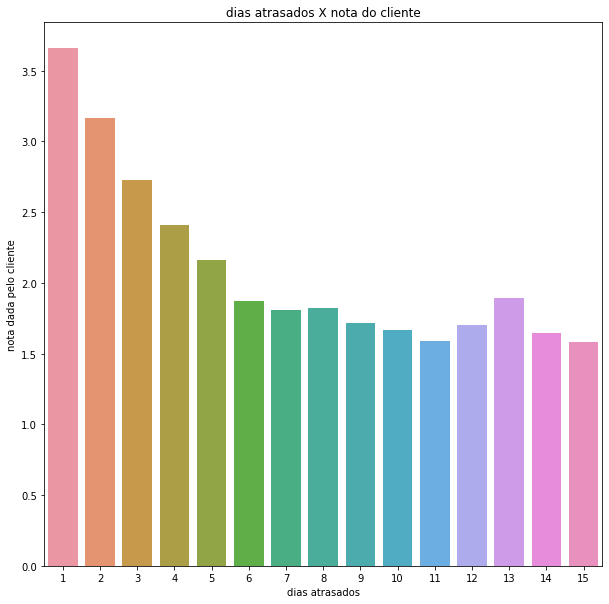

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(data=late_del_rev, y='review_score', x='dif_dias')
plt.title('dias atrasados X nota do cliente')
plt.xlabel('dias atrasados')
plt.ylabel('nota dada pelo cliente')

### Subpopulacoes

Foi considerado separar o conjunto de dados em subpopulacoes por estado, porém a média dos reviews por estado nao apresenta muita variacao, sendo assim faz sentido considerar o conjunto homogeneo

In [ ]:
review_state = olist.groupby(["customer_state"])[["review_score"]].count().sort_values(by="review_score", ascending=False).reset_index()
review_state

,customer_state,review_score
0,SP,41020
1,RJ,13486
2,MG,11977
3,RS,5586
4,PR,5027
5,SC,3747
6,BA,3459
7,DF,2051
8,ES,2040
9,GO,2011


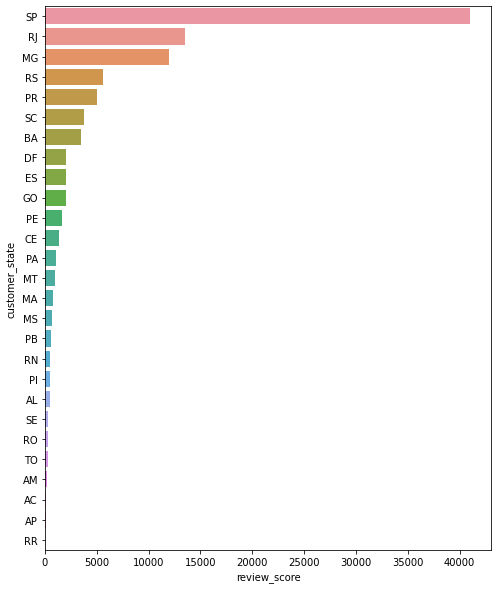

In [ ]:
plt.figure(figsize=(8,10))

sns.barplot(data=review_state, x='review_score', y='customer_state')
# plt.title('dias atrasados X nota do cliente')
# plt.xlabel('dias atrasados')
# plt.ylabel('nota dada pelo cliente')

In [ ]:
review_state_mean = olist.groupby(["customer_state"])[["review_score"]].mean().sort_values(by="review_score", ascending=False).reset_index()
review_state_mean

,customer_state,review_score
0,PR,4.176447
1,SP,4.136251
2,TO,4.122605
3,RO,4.118467
4,MG,4.113801
5,RS,4.109560
6,RN,4.107900
7,DF,4.090687
8,MS,4.071724
9,AM,4.064103


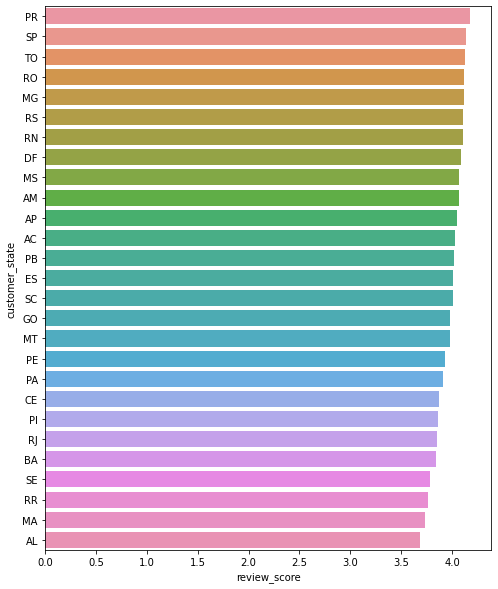

In [ ]:
plt.figure(figsize=(8,10))

sns.barplot(data=review_state_mean, x='review_score', y='customer_state')
# plt.title('dias atrasados X nota do cliente')
# plt.xlabel('dias atrasados')
# plt.ylabel('nota dada pelo cliente')

In [ ]:
review_state_mean.describe()

,review_score
count,27.000000
mean,3.977346
std,0.138061
min,3.684091
25%,3.863954
50%,4.007353
75%,4.099294
max,4.176447


### Score pelo status da compra

In [ ]:
review_count_status = olist.groupby(["order_status"])[["review_score"]].count().sort_values(by="review_score", ascending=False).reset_index()
review_count_status

,order_status,review_score
0,delivered,97590
1,shipped,1190
2,canceled,486
3,processing,392
4,invoiced,331
5,unavailable,9
6,approved,2


In [ ]:
olist["review_score"][olist["order_status"] == "canceled"].mean()

1.5967078189300412

In [ ]:
olist["review_score"][olist["order_status"] == "shipped"].mean()

2.033613445378151

In [ ]:
olist["review_score"][olist["order_status"] == "processing"].mean()

1.2857142857142858

In [ ]:
olist["review_score"][olist["order_status"] == "invoiced"].mean()

1.700906344410876

In [ ]:
olist["review_score"][olist["order_status"] == "unavailable"].mean()

1.4444444444444444

In [ ]:
olist["review_score"][olist["order_status"] == "approved"].mean()

2.5

In [ ]:
olist["review_score"][olist["order_status"] == "delivered"].mean()

4.11035966799877

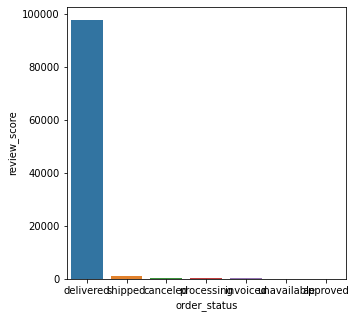

In [ ]:
plt.figure(figsize=(5,5))

sns.barplot(data=review_count_status, y='review_score', x='order_status')
# plt.title('dias atrasados X nota do cliente')
# plt.xlabel('dias atrasados')
# plt.ylabel('nota dada pelo cliente')

In [ ]:
review_mean_status=olist.groupby(["order_status"])[["review_score"]].mean().sort_values(by="review_score", ascending=False).reset_index()

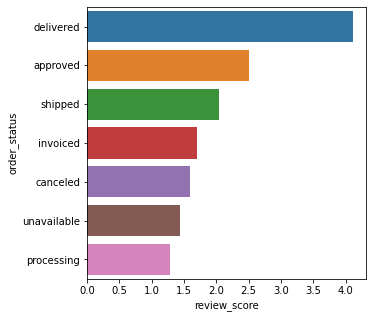

In [ ]:
plt.figure(figsize=(5,5))

sns.barplot(data=review_mean_status, x='review_score', y='order_status')
# plt.title('dias atrasados X nota do cliente')
# plt.xlabel('dias atrasados')
# plt.ylabel('nota dada pelo cliente')

#### Selecao dos status delivered

Como nossa hipotese é em cima das compras entregues, e queremos prever a avaliacao dos clientes antes da compra ser entregue ao cliente, dessa forma o modelo deve ser treinado com registros de compras que foram enviadas e entregues

In [ ]:
olist = olist[olist["order_status"] == "delivered"]

### Percebemos que existem valores faltantes para as features "order_delivered_customer_date" e "order_approved_at"

### Por que?

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97590 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   97590 non-null  object 
 1   order_products_value           97590 non-null  float64
 2   order_freight_value            97590 non-null  float64
 3   order_items_qty                97590 non-null  int64  
 4   order_sellers_qty              97590 non-null  int64  
 5   order_purchase_timestamp       97590 non-null  object 
 6   order_aproved_at               97573 non-null  object 
 7   order_estimated_delivery_date  97590 non-null  object 
 8   order_delivered_customer_date  97586 non-null  object 
 9   customer_state                 97590 non-null  object 
 10  product_category_name          97590 non-null  object 
 11  product_photos_qty             97590 non-null  int64  
 12  review_score                   97590 non-null 

In [ ]:
olist[olist["order_aproved_at"].isna()]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score
2167,delivered,11.99,10.96,1,1,2017-02-08,NaT,2017-03-07,2017-02-24,SP,eletronicos,1,5
9520,delivered,79.99,26.82,1,1,2017-02-18,NaT,2017-03-31,2017-03-09,CE,cool_stuff,1,5
10426,delivered,135.00,19.23,1,1,2017-02-17,NaT,2017-03-20,2017-03-03,MG,ferramentas_jardim,3,5
12680,delivered,133.99,23.20,1,1,2017-02-17,NaT,2017-03-23,2017-03-03,RS,cama_mesa_banho,1,3
13363,delivered,19.90,14.52,1,1,2017-02-18,NaT,2017-03-23,2017-03-01,SP,informatica_acessorios,2,5
20279,delivered,99.90,17.54,1,1,2017-02-18,NaT,2017-03-28,2017-03-02,RJ,esporte_lazer,1,5
21170,delivered,79.99,15.77,1,1,2017-02-17,NaT,2017-03-20,2017-03-02,RJ,cool_stuff,1,5
22171,delivered,45.90,14.52,1,1,2017-01-19,NaT,2017-03-16,2017-02-06,MG,moveis_decoracao,1,2
23456,delivered,59.20,35.03,1,1,2017-02-18,NaT,2017-03-31,2017-03-10,RO,beleza_saude,1,5
25017,delivered,79.90,15.77,1,1,2017-01-19,NaT,2017-03-03,2017-02-03,RJ,cama_mesa_banho,2,4


In [ ]:
olist["order_aproved_at"].isna().sum()

17

In [ ]:
(olist["order_aproved_at"] - olist["order_purchase_timestamp"])

0       1 days
1       1 days
2       0 days
3       0 days
4       5 days
         ...  
99995   2 days
99996   0 days
99997   0 days
99998   0 days
99999   0 days
Length: 97590, dtype: timedelta64[ns]

Para a feature "order_aproved_at" temos 1 dados com registros nulos, analisando esses 17 registros, vemos que se trata de dados que tem uma data de compra e tiveram a entrega realizada, ou seja, analisando os dados nao conseguimos encontrar uma explicacao para justificar alguma manipulacao para preencher esses dados.

Existe um tempo entre a data de compra ("order_purchase_timestamp") e data de aprovacao ("order_aproved_at"), poderiamos utilizar alguma operacao estatitica para preeencher.

Como existem apenas 17 dados faltantes, optamos por retirar esses registros do conjunto de dados.

In [ ]:
olist = olist[olist["order_aproved_at"].notnull()]

In [ ]:
olist.isna().sum()

order_status                     0
order_products_value             0
order_freight_value              0
order_items_qty                  0
order_sellers_qty                0
order_purchase_timestamp         0
order_aproved_at                 0
order_estimated_delivery_date    0
order_delivered_customer_date    4
customer_state                   0
product_category_name            0
product_photos_qty               0
review_score                     0
dtype: int64

#### Dados faltantes da "order_delivered_customer_date"

In [ ]:
olist[olist["order_delivered_customer_date"].isna()]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score
39657,delivered,157.0,19.20,1,1,2018-08-30,2018-08-30,2018-09-19,NaT,PR,relogios_presentes,1,5
64719,delivered,29.9,7.47,1,1,2018-09-02,2018-09-02,2018-09-13,NaT,SP,beleza_saude,1,5
77255,delivered,329.0,25.24,1,1,2018-06-20,2018-06-20,2018-07-16,NaT,SP,industria_comercio_e_negocios,1,5
96775,delivered,429.0,16.34,1,1,2018-06-26,2018-06-27,2018-08-15,NaT,MG,perfumaria,1,5


Consideramos esses 4 registros anomalos, pois eles tem status "delivered" porém nao existe a data em que a entrega foi realizada, dessa forma iremos remover esses registros

In [ ]:
olist = olist[olist["order_delivered_customer_date"].notnull()]

In [ ]:
olist.isna().sum()

order_status                     0
order_products_value             0
order_freight_value              0
order_items_qty                  0
order_sellers_qty                0
order_purchase_timestamp         0
order_aproved_at                 0
order_estimated_delivery_date    0
order_delivered_customer_date    0
customer_state                   0
product_category_name            0
product_photos_qty               0
review_score                     0
dtype: int64

# Construcao de features

In [ ]:
olist["dif_estimated_real"] = olist['order_estimated_delivery_date'] - olist['order_delivered_customer_date']

olist['dif_estimated_real'] = olist['dif_estimated_real'].dt.days.copy()

In [ ]:
olist['dif_estimated_real']

0        37
1        19
2        29
3         0
4        20
         ..
99995    20
99996    10
99997    11
99998    13
99999    20
Name: dif_estimated_real, Length: 97569, dtype: int64

In [ ]:
olist.shape

(97569, 14)

In [ ]:
olist["real_delivered_time"] = (olist["order_delivered_customer_date"] - olist["order_aproved_at"]).dt.days


In [ ]:
olist["estimated_delivered_time"] = (olist["order_estimated_delivery_date"] - olist["order_aproved_at"]).dt.days

In [ ]:
olist["is_late"] = olist['dif_estimated_real'] < 0

In [ ]:
olist["is_late"] = olist["is_late"].astype("int64")

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97569 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   97569 non-null  object 
 1   order_products_value           97569 non-null  float64
 2   order_freight_value            97569 non-null  float64
 3   order_items_qty                97569 non-null  int64  
 4   order_sellers_qty              97569 non-null  int64  
 5   order_purchase_timestamp       97569 non-null  object 
 6   order_aproved_at               97569 non-null  object 
 7   order_estimated_delivery_date  97569 non-null  object 
 8   order_delivered_customer_date  97569 non-null  object 
 9   customer_state                 97569 non-null  object 
 10  product_category_name          97569 non-null  object 
 11  product_photos_qty             97569 non-null  int64  
 12  review_score                   97569 non-null 

# Verificacao de qualidade dos dados

### Foi verificado que existem registros com data de entrega anterior a data de aprovacao, resultando em tempo de entregas com valores invalidos

In [ ]:
olist[olist.real_delivered_time < 0]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score,dif_estimated_real,real_delivered_time,estimated_delivered_time,is_late
11224,delivered,229.00,13.10,1,1,2017-09-01,2017-09-13,2017-09-20,2017-09-12,SP,automotivo,2,4,8,-1,7,0
13860,delivered,49.00,8.50,1,1,2018-08-03,2018-08-08,2018-08-08,2018-08-07,SP,relogios_presentes,7,5,1,-1,0,0
14567,delivered,49.90,9.03,1,2,2018-01-29,2018-02-03,2018-02-14,2018-02-02,SP,moveis_decoracao,3,5,12,-1,11,0
17690,delivered,31.99,15.32,1,1,2018-08-09,2018-08-20,2018-08-23,2018-08-17,RJ,cool_stuff,4,4,6,-3,3,0
18061,delivered,19.90,7.78,1,1,2017-12-06,2017-12-11,2017-12-22,2017-12-08,SP,market_place,3,5,14,-3,11,0
20174,delivered,19.99,14.10,1,1,2017-09-01,2017-09-13,2017-09-21,2017-09-12,RJ,esporte_lazer,1,4,9,-1,8,0
21255,delivered,269.00,15.49,1,1,2017-09-01,2017-09-13,2017-09-21,2017-09-11,SP,casa_conforto,3,5,10,-2,8,0
33333,delivered,89.18,9.44,1,1,2018-01-30,2018-02-04,2018-02-15,2018-02-01,SP,utilidades_domesticas,1,5,14,-3,11,0
39934,delivered,29.90,8.37,1,1,2018-07-22,2018-07-27,2018-07-31,2018-07-26,SP,utilidades_domesticas,2,4,5,-1,4,0
43986,delivered,24.90,15.10,1,1,2017-06-26,2017-07-05,2017-07-18,2017-07-03,RS,relogios_presentes,1,4,15,-2,13,0


In [ ]:
olist = olist[olist.real_delivered_time >= 0]

In [ ]:
olist[olist.real_delivered_time < 0]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score,dif_estimated_real,real_delivered_time,estimated_delivered_time,is_late


### Foi verificado que existem registros com etimativa de data de entrega anterior a data de aprovacao, resultando em tempo de entregas com valores invalidos

In [ ]:
olist[olist.estimated_delivered_time < 0]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score,dif_estimated_real,real_delivered_time,estimated_delivered_time,is_late
90369,delivered,75.0,7.79,1,1,2018-08-18,2018-08-24,2018-08-23,2018-08-28,SP,relogios_presentes,6,2,-5,4,-1,1


In [ ]:
olist = olist[olist.estimated_delivered_time >= 0]

In [ ]:
olist[olist.estimated_delivered_time < 0]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_photos_qty,review_score,dif_estimated_real,real_delivered_time,estimated_delivered_time,is_late


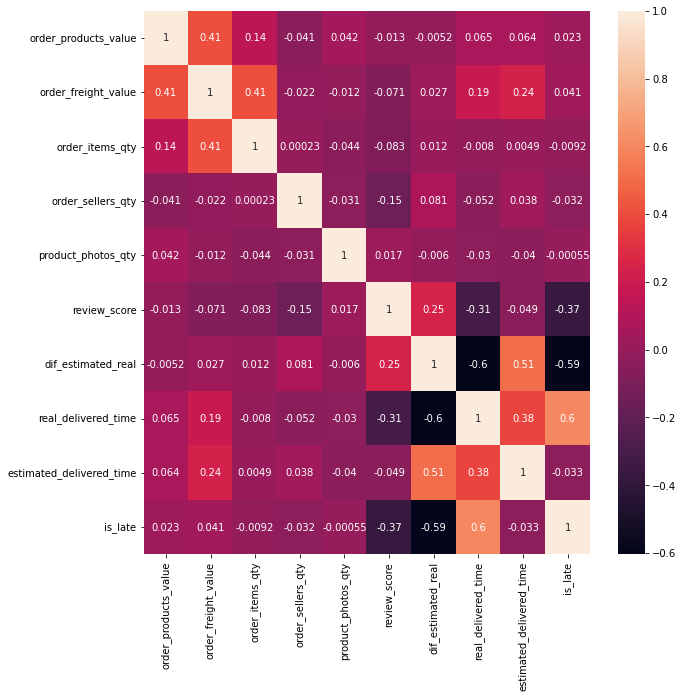

In [ ]:
plt.subplots(figsize=(10,10))
corrMatrix = olist.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Preparacao dos dados

## Aplicando One hot encoding nas features categoricas

In [ ]:
olist.columns

Index(['order_status', 'order_products_value', 'order_freight_value',
       'order_items_qty', 'order_sellers_qty', 'order_purchase_timestamp',
       'order_aproved_at', 'order_estimated_delivery_date',
       'order_delivered_customer_date', 'customer_state',
       'product_category_name', 'product_photos_qty', 'review_score',
       'dif_estimated_real', 'real_delivered_time', 'estimated_delivered_time',
       'is_late'],
      dtype='object')

In [ ]:
dataset = olist[
                ["order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                 'customer_state', 'product_category_name', 'product_photos_qty', 'real_delivered_time', 
                 'estimated_delivered_time', 'dif_estimated_real', 'is_late' , 'review_score'
                 ]
                ]

In [ ]:
dataset

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_state,product_category_name,product_photos_qty,real_delivered_time,estimated_delivered_time,dif_estimated_real,is_late,review_score
0,349.90,13.84,1,1,PR,beleza_saude,1,5,42,37,0,5
1,15.00,15.10,1,1,MG,informatica_acessorios,2,3,22,19,0,5
2,238.90,18.00,1,1,SP,automotivo,1,7,36,29,0,5
3,29.99,18.23,1,1,GO,cama_mesa_banho,1,23,23,0,0,4
4,295.99,47.65,1,1,PE,moveis_decoracao,2,9,29,20,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,198.00,91.98,2,1,BA,ferramentas_jardim,1,7,27,20,0,5
99996,59.00,11.02,1,1,SP,telefonia,1,9,19,10,0,5
99997,119.99,18.09,1,1,SP,esporte_lazer,1,14,25,11,0,5
99998,119.99,18.09,1,1,MG,cool_stuff,1,7,20,13,0,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97538 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_products_value      97538 non-null  float64
 1   order_freight_value       97538 non-null  float64
 2   order_items_qty           97538 non-null  int64  
 3   order_sellers_qty         97538 non-null  int64  
 4   customer_state            97538 non-null  object 
 5   product_category_name     97538 non-null  object 
 6   product_photos_qty        97538 non-null  int64  
 7   real_delivered_time       97538 non-null  int64  
 8   estimated_delivered_time  97538 non-null  int64  
 9   dif_estimated_real        97538 non-null  int64  
 10  is_late                   97538 non-null  int64  
 11  review_score              97538 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 9.7+ MB


In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["customer_state", "product_category_name"] )
# merge with main df bridge_df on key values
dum_df

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_photos_qty,real_delivered_time,estimated_delivered_time,dif_estimated_real,is_late,review_score,...,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
0,349.90,13.84,1,1,1,5,42,37,0,5,...,0,0,0,0,0,0,0,0,0,0
1,15.00,15.10,1,1,2,3,22,19,0,5,...,0,0,0,0,0,0,0,0,0,0
2,238.90,18.00,1,1,1,7,36,29,0,5,...,0,0,0,0,0,0,0,0,0,0
3,29.99,18.23,1,1,1,23,23,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,295.99,47.65,1,1,2,9,29,20,0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,198.00,91.98,2,1,1,7,27,20,0,5,...,0,0,0,0,0,0,0,0,0,0
99996,59.00,11.02,1,1,1,9,19,10,0,5,...,0,0,0,0,0,0,0,1,0,0
99997,119.99,18.09,1,1,1,14,25,11,0,5,...,0,0,0,0,0,0,0,0,0,0
99998,119.99,18.09,1,1,1,7,20,13,0,1,...,0,0,0,0,0,0,0,0,0,0


Verificando a correlacao utilizando também as features que antes eram categoricas

In [ ]:
pd.DataFrame(corrMatrix["review_score"].sort_values(ascending=False)).head(20)

,review_score
review_score,1.000000
dif_estimated_real,0.246074
product_photos_qty,0.017195
order_products_value,-0.013019
estimated_delivered_time,-0.048889
order_freight_value,-0.070927
order_items_qty,-0.083288
order_sellers_qty,-0.150055
real_delivered_time,-0.310188
is_late,-0.366918


In [ ]:
pd.DataFrame(corrMatrix["review_score"].sort_values(ascending=True)).head(20)

,review_score
is_late,-0.366918
real_delivered_time,-0.310188
order_sellers_qty,-0.150055
order_items_qty,-0.083288
order_freight_value,-0.070927
estimated_delivered_time,-0.048889
order_products_value,-0.013019
product_photos_qty,0.017195
dif_estimated_real,0.246074
review_score,1.000000


# Modelo - Trabalho a partir daqui

## Helpers

In [ ]:
def pre_processing(df, scale=0):
  df = df.copy()
  df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date
  df['order_aproved_at'] = pd.to_datetime(df['order_aproved_at']).dt.date
  df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date
  df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.date
  df.drop(columns=['review_comment_title', 'review_comment_message', 'order_id', 'customer_id', 'customer_city', 'customer_zip_code_prefix', 
        'product_name_lenght', 'product_description_lenght',
        'product_id', 'review_id', 'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)
  
  # 
  df = df[df["order_status"] == "delivered"]
  df = df[df["order_aproved_at"].notnull()]
  df = df[df["order_delivered_customer_date"].notnull()]

  # const feat
  
  df["dif_estimated_real"] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
  df['dif_estimated_real'] = df['dif_estimated_real'].dt.days.copy()
  df["real_delivered_time"] = (df["order_delivered_customer_date"] - df["order_aproved_at"]).dt.days
  df["estimated_delivered_time"] = (df["order_estimated_delivery_date"] - df["order_aproved_at"]).dt.days
  df["is_late"] = df['dif_estimated_real'] < 0
  df["is_late"] = df["is_late"].astype("int64")

  # linhas sem sentido
  df = df[df.real_delivered_time >= 0]
  df = df[df.estimated_delivered_time >= 0]

  # load the dataset
  X = df[["order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                 'customer_state', 'product_category_name', 'product_photos_qty', 'real_delivered_time', 
                 'estimated_delivered_time', 'dif_estimated_real', 'is_late']]
  y = df[["review_score"]]

  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  if scale == 1:
    colunas = ["order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                  'product_photos_qty', 'real_delivered_time', 
                  'estimated_delivered_time', 'dif_estimated_real', 'is_late']
    scaler = StandardScaler()
    X_train[colunas] = scaler.fit_transform(X_train[colunas])
    X_test[colunas] = scaler.transform(X_test[colunas])

  # one-hot-encoding
  X_train = pd.get_dummies(X_train, columns=["customer_state", "product_category_name"] )
  X_test = pd.get_dummies(X_test, columns=["customer_state", "product_category_name"] )

  return X_train, X_test, y_train, y_test

In [ ]:
def output_fix(df):
  df = pd.DataFrame(df)
  df.rename(columns={0: "Score"}, inplace=True)
  df["Score"] = df["Score"].apply(lambda x: 1 if x >= 1 and x <= 1.5 else x)
  df["Score"] = df["Score"].apply(lambda x: 2 if x > 1.5 and x <= 2 else x)
  df["Score"] = df["Score"].apply(lambda x: 2 if x >= 2 and x <= 2.5 else x)
  df["Score"] = df["Score"].apply(lambda x: 3 if x > 2.5 and x <= 3 else x)
  df["Score"] = df["Score"].apply(lambda x: 3 if x >= 3 and x <= 3.5 else x)
  df["Score"] = df["Score"].apply(lambda x: 4 if x > 3.5 and x <= 4 else x)
  df["Score"] = df["Score"].apply(lambda x: 4 if x >= 4 and x <= 4.5 else x)
  df["Score"] = df["Score"].apply(lambda x: 5 if x > 4.5 and x <= 5 else x)
  df["Score"] = df["Score"].astype("int")
  return df

In [ ]:
# load the dataset
X_train, X_test, y_train, y_test = pre_processing(data,1)
X_train_n, X_test_n, y_train_n, y_test_n = pre_processing(data)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (68276, 107) (68276, 1)
Test (29262, 107) (29262, 1)


[5, 4, 3, 1, 2] [39527, 13304, 6026, 7140, 2279]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


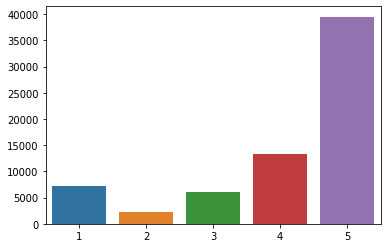

In [ ]:
# Grafico de barras mostrando quantidade de dados para cada classe de targets, revelando um desbalanceamento
nota = []
quantidade = []
for i, j in zip(Counter(y_train["review_score"]).values(),Counter(y_train["review_score"]).keys()):
  nota.append(j), quantidade.append(i)
print(nota, quantidade)

sns.barplot(nota, quantidade)

In [ ]:
X_test

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_photos_qty,real_delivered_time,estimated_delivered_time,dif_estimated_real,is_late,customer_state_AC,...,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
29862,-0.035882,0.374011,-0.218675,-0.202008,-0.732701,1.567509,1.430536,-0.221314,-0.258094,0,...,0,0,0,0,0,0,0,0,0,0
70025,-0.424428,-0.240406,-0.218675,-0.202008,-0.160113,0.826518,0.747285,-0.122762,-0.258094,0,...,0,0,0,0,0,0,0,0,0,0
41910,-0.586418,-0.437651,-0.218675,-0.202008,-0.732701,-0.549606,-1.074717,-0.418419,-0.258094,0,...,0,0,0,0,0,0,0,0,0,0
48084,-0.256707,0.218187,-0.218675,-0.202008,0.985063,-0.549606,3.252538,3.326569,-0.258094,0,...,0,0,0,0,0,0,0,0,0,1
1582,-0.503346,-0.373053,-0.218675,-0.202008,-0.732701,-0.443750,-0.049841,0.370000,-0.258094,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64397,0.216488,0.506658,-0.218675,-0.202008,0.985063,1.144086,-0.277591,-1.305389,3.874557,0,...,0,0,0,0,0,0,0,0,0,0
1558,-0.613706,-0.323742,-0.218675,-0.202008,2.130239,5.484171,0.064034,-5.050377,3.874557,0,...,0,0,0,0,0,0,0,0,0,0
24849,-0.540098,-0.263583,-0.218675,-0.202008,-0.732701,-0.232039,-0.163716,0.074343,-0.258094,0,...,0,0,0,0,0,0,0,0,0,1
42328,-0.389990,-0.562901,-0.218675,1.206805,-0.160113,0.403096,-0.049841,-0.418419,-0.258094,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.919


preprocessado

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.919


In [ ]:
# feature selection
def select_features(X_train, y_train, X_test, k):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=k)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 9.890497
Feature 1: 349.633855
Feature 2: 450.812422
Feature 3: 1569.121223
Feature 4: 16.903983
Feature 5: 7354.896243
Feature 6: 184.254111
Feature 7: 4376.318510
Feature 8: 10708.829484
Feature 9: 0.120197
Feature 10: 26.417730
Feature 11: 0.036561
Feature 12: 0.001880
Feature 13: 69.986129
Feature 14: 11.424146
Feature 15: 0.000938
Feature 16: 1.499246
Feature 17: 5.759763
Feature 18: 21.517821
Feature 19: 6.965983
Feature 20: 0.003030
Feature 21: 1.819168
Feature 22: 4.985779
Feature 23: 0.994391
Feature 24: 11.024890
Feature 25: 2.343941
Feature 26: 30.071420
Feature 27: 184.231010
Feature 28: 0.004484
Feature 29: 0.047247
Feature 30: 0.032860
Feature 31: 5.123576
Feature 32: 7.994871
Feature 33: 9.143338
Feature 34: 192.152202
Feature 35: 1.468722
Feature 36: 0.286480
Feature 37: 1.828918
Feature 38: 7.376988
Feature 39: 9.194493
Feature 40: 0.278132
Feature 41: 0.168035
Feature 42: 1.009038
Feature 43: 0.002318
Feature 44: 0.943152
Feature 45: 2.263192
Feature 46: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


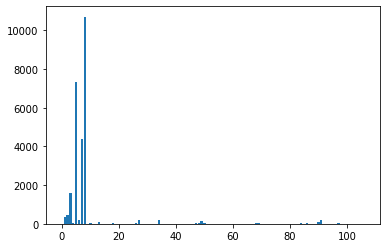

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, "all")
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 107)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.919


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedKFold

# # define the evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define the pipeline to evaluate
# model = LinearRegression()
# fs = SelectKBest(score_func=f_regression)
# pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# # define the grid
# grid = dict()
# grid['sel__k'] = [i for i in range(X_train.shape[1]-20, X_train.shape[1]+1)]
# # define the grid search
# search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# # perform the search
# results = search.fit(X_train, y_train)
# # summarize best
# print('Best MAE: %.3f' % results.best_score_)
# print('Best Config: %s' % results.best_params_)
# # summarize all
# means = results.cv_results_['mean_test_score']
# params = results.cv_results_['params']
# for mean, param in zip(means, params):
#     print(">%.3f with: %r" % (mean, param))

In [ ]:
# # feature selection
# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 87)
# # fit the model
# model = LinearRegression()
# model.fit(X_train_fs, y_train)
# # evaluate the model
# yhat = model.predict(X_test_fs)
# # evaluate predictions
# mae = mean_absolute_error(y_test, yhat)
# print('MAE: %.3f' % mae)

## LinearSVR

In [ ]:
svr = LinearSVR(random_state=0, tol=1e-5)

svr.fit(X_train, y_train)
y_hat = svr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
y_hat

array([4.99939218, 4.99964823, 4.99990796, ..., 4.99985608, 4.63618106,
       4.99981029])

In [ ]:
mae = mean_absolute_error(y_test, y_hat)
print('MAE: %.3f' % mae)

MAE: 0.786


In [ ]:
# discretizando os resultados continuos da predicao pois usamos um modelo de regressao
df_out = output_fix(y_hat)
df_out

,Score
0,5
1,5
2,5
3,5
4,5
...,...
29257,1
29258,1
29259,5
29260,5


In [ ]:
mae = mean_absolute_error(y_test, df_out)
print('MAE: %.3f' % mae)

MAE: 0.788


In [ ]:
accuracy_score(y_test, df_out)

0.5917914018180576

## RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


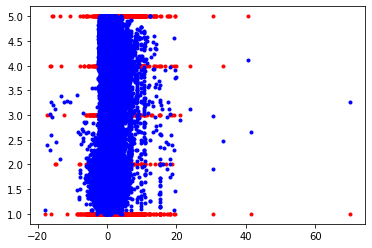

In [ ]:
#Define Random Forest Regressor 
rf = RandomForestRegressor(n_estimators=50, n_jobs=-1)

reg1 = rf.fit(X_train, y_train)
expected_Y_rf = rf.predict(X_test)
plt.plot(X_test, y_test , 'r.')
plt.plot(X_test, expected_Y_rf, 'b.')

# grafico abaixo mostra os valores continuos preditos comparando com o target real (discreto 1,2,3,4,5)

In [ ]:
mae = mean_absolute_error(y_test, expected_Y_rf)
print('MAE: %.3f' % mae)

MAE: 0.906


In [ ]:
# discretizando a predicao para ficar 1,2,3,4,5
expected_Y_rf = output_fix(expected_Y_rf)

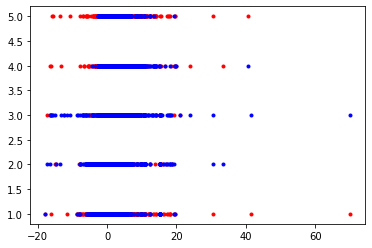

In [ ]:
plt.plot(X_test, y_test , 'r.')
plt.plot(X_test, expected_Y_rf, 'b.')
# grafico abaixo mostra como fica a predicao apos fazer a discretizacao

In [ ]:
mae = mean_absolute_error(y_test, expected_Y_rf)
print('MAE: %.3f' % mae)

MAE: 0.895


In [ ]:
accuracy_score(y_test, expected_Y_rf)

0.33914291572688127

# Classifiers

### Helpers

In [ ]:
#funcao para plotar a matriz de confusao
def conf_matrix(x,y,model):
  class_names = [1,2,3,4,5]
  np.set_printoptions(precision=2)
  # Plot non-normalized confusion matrix
  titles_options = [
      ("Confusion matrix, without normalization", None)]
  for title in titles_options:
      disp = ConfusionMatrixDisplay.from_estimator(
          model,
          x,
          y,
          display_labels=class_names,
          cmap=plt.cm.Blues,
      )
      disp.ax_.set_title(title)
      print(title)
      print(disp.confusion_matrix)
  plt.show()

### RandomForest Classifier

#### Dados padronizados

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
clf_pred=pd.DataFrame(clf_pred)

In [ ]:
clf_pred.to_numpy()

array([[1],
       [5],
       [5],
       ...,
       [5],
       [5],
       [5]])

In [ ]:
mae = mean_absolute_error(y_test, clf_pred)
print('MAE: %.3f' % mae)

MAE: 0.773


In [ ]:
accuracy_score(y_test, clf_pred)

0.5936026245642814

####  Sem padronizar

In [ ]:
clf_p = RandomForestClassifier(random_state=0)
clf_p.fit(X_train_n, y_train_n)
clf_pred_p = clf_p.predict(X_test_n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
clf_pred_p=pd.DataFrame(clf_pred_p)

In [ ]:
clf_pred_p.to_numpy()

array([[1],
       [5],
       [5],
       ...,
       [5],
       [5],
       [5]])

In [ ]:
mae = mean_absolute_error(y_test_n, clf_pred_p)
print('MAE: %.3f' % mae)

MAE: 0.772


('Confusion matrix, without normalization', None)
[[ 1227    15    41   114  1673]
 [  181    45    14    55   676]
 [  224    19   124   153  2004]
 [  184    43    79   433  5056]
 [  374    36   168   783 15541]]


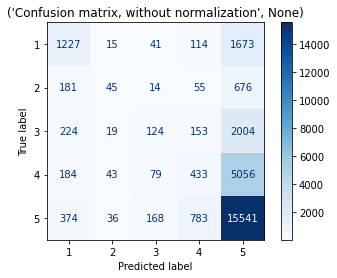

In [ ]:
conf_matrix(X_test_n,y_test_n,clf_p)

In [ ]:
accuracy_score(y_test, clf_pred_p)

0.5936026245642814

### Decision Tree Classifier

https://scikit-learn.org/stable/modules/tree.html#tree

#### padronizar

In [ ]:
clff = tree.DecisionTreeClassifier()
clff = clff.fit(X_train, y_train)

In [ ]:
tree_pred = clff.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, tree_pred)
print('MAE: %.3f' % mae)

MAE: 1.036


('Confusion matrix, without normalization', None)
[[  989   190   324   450  1117]
 [  205    80    97   148   441]
 [  314   110   340   511  1249]
 [  449   200   511  1289  3346]
 [ 1174   473  1390  3489 10376]]


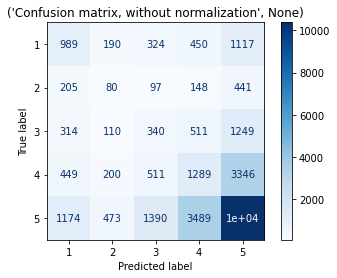

In [ ]:
conf_matrix(X_test,y_test,clff)

In [ ]:
accuracy_score(y_test, tree_pred)

0.44679106007791675

#### Feature selection

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 4)


clff_fs = tree.DecisionTreeClassifier()
clff_fs = clff_fs.fit(X_train_fs, y_train)
tree_pred_fs = clff_fs.predict(X_test_fs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mae = mean_absolute_error(y_test, tree_pred_fs)
print('MAE: %.3f' % mae)

MAE: 0.777


('Confusion matrix, without normalization', None)
[[ 1121    44    72   107  1726]
 [  166    56    15    26   708]
 [  235    20   100    57  2112]
 [  197    16    60   206  5316]
 [  379    56   127   256 16084]]


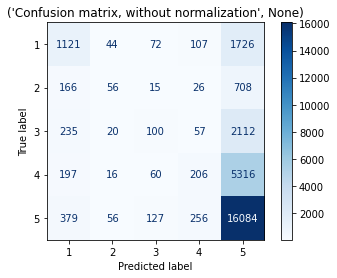

In [ ]:
conf_matrix(X_test_fs,y_test,clff_fs)

In [ ]:
accuracy_score(y_test, tree_pred_fs)

0.600334905337981

### Linear SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [ ]:
svc = LinearSVC(random_state=0, tol=1e-5, C=0.001)
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=0.001, random_state=0, tol=1e-05)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, svc_pred)
print('MAE: %.3f' % mae)

MAE: 0.792


('Confusion matrix, without normalization', None)
[[ 1084     0     0     3  1983]
 [  188     0     0     1   782]
 [  227     0     0     3  2294]
 [  235     0     0     5  5555]
 [  348     0     0     4 16550]]


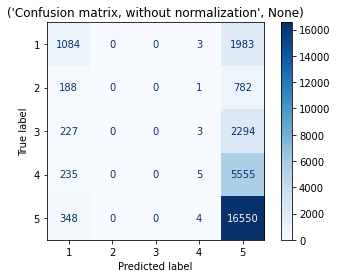

In [ ]:
conf_matrix(X_test,y_test,svc)

In [ ]:
accuracy_score(y_test, svc_pred)

0.602795434351719

### LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic regression classifier on training set: 0.60
Accuracy of Logistic regression classifier on test set: 0.60


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


('Confusion matrix, without normalization', None)
[[ 1111     0     0     4  1955]
 [  195     0     0     1   775]
 [  244     0     1     6  2273]
 [  241     0     1     5  5548]
 [  359     0     0    10 16533]]


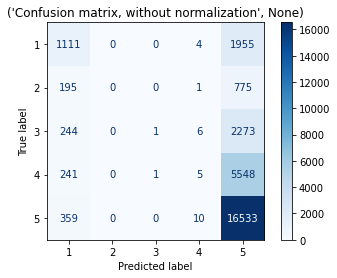

In [ ]:
conf_matrix(X_test,y_test,logreg)

In [ ]:
mae = mean_absolute_error(y_test, logreg_pred)
print('MAE: %.3f' % mae)

MAE: 0.790


In [ ]:
accuracy_score(y_test, logreg_pred)

0.6031713485065956

### kNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =4)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.50


In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, knn_pred)
print('MAE: %.3f' % mae)

MAE: 0.942


('Confusion matrix, without normalization', None)
[[ 1269    65   138   348  1250]
 [  247    36    47   163   478]
 [  383    38   156   491  1456]
 [  478    90   252  1145  3830]
 [ 1067   186   686  3018 11945]]


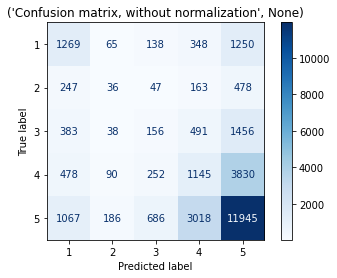

In [ ]:
conf_matrix(X_test,y_test,knn)

In [ ]:
accuracy_score(y_test, knn_pred)

0.4972660788736245

### Balanceamento de dados

#### usando oversample SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# transform the dataset
oversample = SMOTE()
X_train_b, y_train_b = oversample.fit_resample(X_train_fs, y_train)
# summarize distribution
# counter = Counter(y_train_b)
# for k,v in counter.items():
# 	per = v / len(y_train_b) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [ ]:
Counter(y_train["review_score"])

Counter({1: 7140, 2: 2279, 3: 6026, 4: 13304, 5: 39527})

In [ ]:
# mostrando como os dados foram balanceados usando a quantidade de dados da classe com maior numero de dados
Counter(y_train_b["review_score"])

Counter({1: 39527, 2: 39527, 3: 39527, 4: 39527, 5: 39527})

##### DecisionTreeClassifier balanceado

In [ ]:
clff_b = tree.DecisionTreeClassifier()
clff_b = clff_b.fit(X_train_b, y_train_b)

In [ ]:
clff_b_pred = clff_b.predict(X_test_fs)

In [ ]:
mae = mean_absolute_error(y_test, clff_b_pred)
print('MAE: %.3f' % mae)

MAE: 1.079


('Confusion matrix, without normalization', None)
[[1144  211  403  526  786]
 [ 182  110  148  206  325]
 [ 281  195  559  577  912]
 [ 322  402 1073 1594 2404]
 [ 701 1086 2813 4016 8286]]


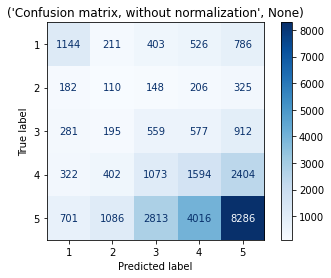

In [ ]:
conf_matrix(X_test_fs,y_test,clff_b)

In [ ]:
accuracy_score(y_test, clff_b_pred)

0.39959674663385963

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_b, y_train_b)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_b, y_train_b)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_fs, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.44
Accuracy of K-NN classifier on test set: 0.52


#### DecisionTree Classifier usando balanceamento aplicando pesos através do parametro class_weight e pesos manualmente

In [ ]:
Counter(y_train["review_score"])

Counter({1: 7140, 2: 2279, 3: 6026, 4: 13304, 5: 39527})

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
weights = {1:1.9124929971988796, 2:5.991750767880649, 3:2.266047129107202, 4:1.0263980757666866 , 5:0.34546512510435906}
model = tree.DecisionTreeClassifier(class_weight=weights)
# define evaluation procedure
# evaluate model
# summarize performance


In [ ]:
68276 / (5 * 7140) , 68276 / (5 * 2279), 68276 / (5 * 6026) , 68276 / (5 * 13304),  68276 / (5 * 39527)

(1.9124929971988796,
 5.991750767880649,
 2.266047129107202,
 1.0263980757666866,
 0.34546512510435906)

In [ ]:
model.fit(X_train, y_train)
y_pred_balanc = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_balanc)

0.4337707607135534

('Confusion matrix, without normalization', None)
[[1046  204  294  445 1081]
 [ 189   98  104  172  408]
 [ 298  133  355  526 1212]
 [ 504  249  626 1273 3143]
 [1309  560 1566 3546 9921]]


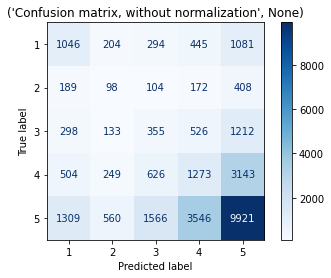

In [ ]:
conf_matrix(X_test,y_test,model)

#### RandomForestClassifier usando class_weight com balanced

In [ ]:
# define model
model = RandomForestClassifier(class_weight="balanced" )
model.fit(X_train, y_train)
y_pred_balanc = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
accuracy_score(y_test, y_pred_balanc)

0.5953796732964254

# Binarizando as targets Test 

- Voltamos ao entendimento dos dados e preprocessamento


In [ ]:


#'product_name_lenght', 'product_description_lenght' adicionados ao dataset

# Funcao de preprocessamento atualizada para binarizar as variaveis target
def pre_test(df, scale=0):
  df = df.copy()
  df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date
  df['order_aproved_at'] = pd.to_datetime(df['order_aproved_at']).dt.date
  df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date
  df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.date
  df.drop(columns=['review_comment_title', 'review_comment_message', 'order_id', 'customer_id', 'customer_city', 'customer_zip_code_prefix', 
                   'product_id', 'review_id', 'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)
  

  df = df[df["order_status"] == "delivered"]
  df = df[df["order_aproved_at"].notnull()]
  df = df[df["order_delivered_customer_date"].notnull()]

  # construcao de features
  df["dif_estimated_real"] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
  df['dif_estimated_real'] = df['dif_estimated_real'].dt.days.copy()
  df["real_delivered_time"] = (df["order_delivered_customer_date"] - df["order_aproved_at"]).dt.days
  df["estimated_delivered_time"] = (df["order_estimated_delivery_date"] - df["order_aproved_at"]).dt.days
  df["is_late"] = df['dif_estimated_real'] < 0
  df["is_late"] = df["is_late"].astype("int64")

  # linhas sem sentido
  df = df[df.real_delivered_time >= 0]
  df = df[df.estimated_delivered_time >= 0]

  # Variaveis target binarizadas, valores menor igual a 3 atribuidos ao valor 0, valores maiores que 3 atribuido ao valor 1
  df.loc[df['review_score'] <= 3 ,'review_score'] = 0
  df.loc[df['review_score'] > 3,'review_score'] = 1
    
  # load the dataset
  X = df[['product_name_lenght', 'product_description_lenght',"order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                 'customer_state', 'product_category_name', 'product_photos_qty', 'real_delivered_time', 
                 'estimated_delivered_time', 'dif_estimated_real', 'is_late']]
  y = df[["review_score"]]

  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  # Condicao para padronizar ou nao os dados
  if scale == 1:
    colunas = ['product_name_lenght', 'product_description_lenght',"order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                  'product_photos_qty', 'real_delivered_time', 
                  'estimated_delivered_time', 'dif_estimated_real', 'is_late']
    scaler = StandardScaler()
    X_train[colunas] = scaler.fit_transform(X_train[colunas])
    X_test[colunas] = scaler.transform(X_test[colunas])

  # one-hot-encoding
  X_train = pd.get_dummies(X_train, columns=["customer_state", "product_category_name"] )
  X_test = pd.get_dummies(X_test, columns=["customer_state", "product_category_name"] )

  return X_train, X_test, y_train, y_test

In [ ]:
X_train_vec, X_test_vec, y_train, y_test = pre_test(data, scale=1)

In [ ]:
X_train_vec

,product_name_lenght,product_description_lenght,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_photos_qty,real_delivered_time,estimated_delivered_time,dif_estimated_real,...,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
68099,1.302170,0.827486,-0.164328,1.259639,-0.218675,-0.202008,-0.732701,1.355797,0.747285,-0.615523,...,0,0,0,0,0,0,0,0,0,0
88062,1.005184,-0.885888,-0.387624,-0.482031,-0.218675,-0.202008,1.557651,-0.549606,-0.505341,0.074343,...,0,0,0,1,0,0,0,0,0,0
91102,-0.083764,-0.759750,-0.587417,0.825208,-0.218675,-0.202008,-0.732701,1.779220,1.999912,0.074343,...,0,0,0,0,0,0,0,0,0,1
43559,-1.172711,-0.699685,-0.203604,-0.309442,-0.218675,-0.202008,-0.732701,-0.337895,-0.277591,0.074343,...,0,0,0,0,0,0,0,0,0,0
16067,-0.083764,-0.307756,-0.550666,-0.198985,-0.218675,-0.202008,-0.732701,-0.655462,0.747285,1.256970,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21988,-0.281754,-0.008929,-0.503820,-0.301059,-0.218675,-0.202008,-0.732701,-0.126183,-0.391466,-0.221314,...,0,0,0,0,0,0,0,0,0,0
75171,0.411212,3.829269,2.374100,-0.226106,-0.218675,-0.202008,0.412475,-0.761318,-0.846967,-0.024209,...,0,0,0,0,0,0,0,0,0,0
51321,0.609203,0.768922,0.059230,-0.195040,-0.218675,-0.202008,-0.732701,0.403096,0.861160,0.370000,...,0,0,0,0,0,0,0,0,0,0
5313,0.708198,2.734572,-0.227316,0.186135,-0.218675,-0.202008,2.702827,-0.337895,-0.163716,0.172895,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Counter(y_train["review_score"]).values()

dict_values([52831, 15445])

para o label 1 temos 52831 dados, 
para o label 0 temos 15445 dados


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


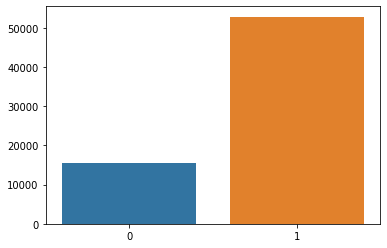

In [ ]:
nota = []
quantidade = []
for i, j in zip(Counter(y_train["review_score"]).values(),Counter(y_train["review_score"]).keys()):
  nota.append(j), quantidade.append(i)
sns.barplot(nota, quantidade)
print(f"para o label {nota[0]} temos {quantidade[0]} dados, \npara o label {nota[1]} temos {quantidade[1]} dados")

In [ ]:
Counter(y_train["review_score"])

Counter({0: 15445, 1: 52831})

## Modelos que vamos usar para comparar e encontrar o melhor

## LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, LinearSVC



## Selecao de features

### As features utilizadas aqui foram selecionadas utilizando o método SelectFromModel do feature_selection e utilizando como estimador o LogisticRegression

In [ ]:
selector = SelectFromModel(LogisticRegression())
feat = selector.fit(X_train_vec,y_train).get_feature_names_out()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("features selecionadas: \n")
feat

features selecionadas: 



array(['order_sellers_qty', 'real_delivered_time', 'is_late',
       'customer_state_AM', 'customer_state_AP', 'customer_state_PB',
       'customer_state_SP', 'customer_state_TO',
       'product_category_name_alimentos',
       'product_category_name_alimentos_bebidas',
       'product_category_name_artes',
       'product_category_name_artigos_de_natal',
       'product_category_name_audio', 'product_category_name_bebidas',
       'product_category_name_cama_mesa_banho',
       'product_category_name_casa_conforto',
       'product_category_name_cds_dvds_musicais',
       'product_category_name_cine_foto',
       'product_category_name_construcao_ferramentas_iluminacao',
       'product_category_name_construcao_ferramentas_seguranca',
       'product_category_name_dvds_blu_ray',
       'product_category_name_fashion_calcados',
       'product_category_name_fashion_roupa_feminina',
       'product_category_name_fashion_roupa_infanto_juvenil',
       'product_category_name_fashion_rou

## Logistic Regression

In [ ]:
# #we have used max_iter 1000 as it was causing exception while fitting
# Logi = LogisticRegression(max_iter=1000,solver='lbfgs')

# param = {'C': [0.0001,0.001,0.01,0.1,1,10,20,30]}

# #for the bow based model
# LR = GridSearchCV(Logi,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
# LR.fit(X_train_vec,y_train)

In [ ]:
# LR.best_params_

In [ ]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegression())),
  # ('classification', LogisticRegression(C=0.1,max_iter=1000,solver='lbfgs'))
  ('classification', LogisticRegression())
])
clf.fit(X_train_vec, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression())),
                ('classification', LogisticRegression())])

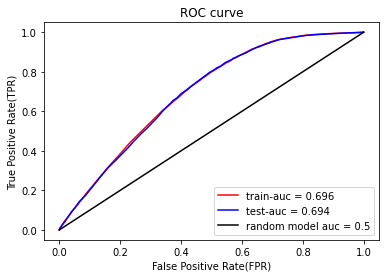

Best AUC for the model is 0.694 


In [ ]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

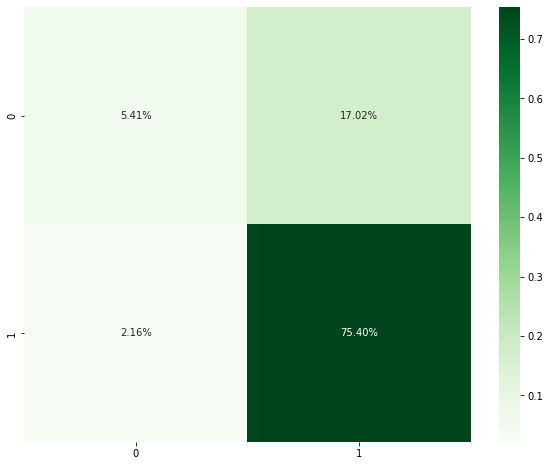

In [ ]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),8))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),8))

Train F1_score for this model is :  0.8867
Test F1_score for this model is :  0.8871


In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),8))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),8))

Train Accuracy score for this model :  0.8075
Test Accuracy score for this model :  0.8081


## RandomForest Classifier

In [ ]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegression())),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train_vec, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression())),
                ('classification', RandomForestClassifier())])

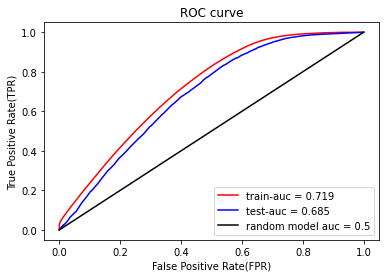

Best AUC for the model is 0.685 


In [ ]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

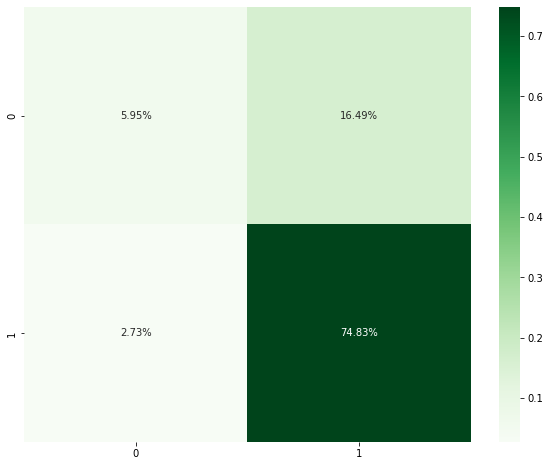

In [ ]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8933
Test F1_score for this model is :  0.8862


In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8198
Test Accuracy score for this model :  0.8078


## DecisionTree Classifier

In [ ]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegression())),
  ('classification', tree.DecisionTreeClassifier())
])
clf.fit(X_train_vec, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression())),
                ('classification', DecisionTreeClassifier())])

In [ ]:
clf =tree.DecisionTreeClassifier()
clf = clf.fit(X_train_vec[feat], y_train)

In [ ]:
clf

DecisionTreeClassifier()

[Text(0.5, 0.9, 'X[2] <= 1.808\ngini = 0.35\nsamples = 68276\nvalue = [15445, 52831]'),
 Text(0.25, 0.7, 'X[0] <= 0.502\ngini = 0.31\nsamples = 64012\nvalue = [12251, 51761]'),
 Text(0.125, 0.5, 'X[1] <= 0.456\ngini = 0.286\nsamples = 59375\nvalue = [10245, 49130]'),
 Text(0.0625, 0.3, 'X[1] <= -0.179\ngini = 0.263\nsamples = 49361\nvalue = [7675, 41686]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[1] <= 1.832\ngini = 0.382\nsamples = 10014\nvalue = [2570, 7444]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[0] <= 3.32\ngini = 0.491\nsamples = 4637\nvalue = [2006, 2631]'),
 Text(0.3125, 0.3, 'X[1] <= -0.285\ngini = 0.456\nsamples = 3057\nvalue = [1074, 1983]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'X[0] <= 10.364\ngini = 0.484\nsamples = 1580\nvalue = [932, 648]'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.46875, 0.1,

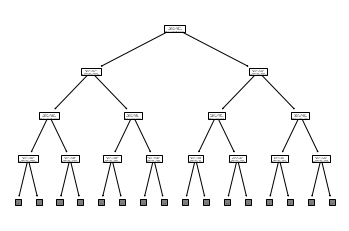

In [ ]:
tree.plot_tree(clf, max_depth=3)

In [ ]:
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("data") 

In [ ]:
# from google.colab import files
# files.download("data.pdf")

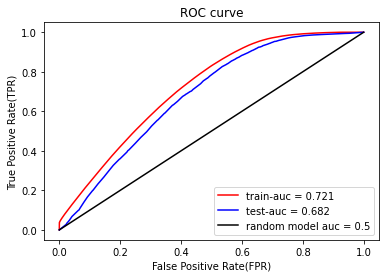

Best AUC for the model is 0.682 


In [ ]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec[feat])
y_pred_test = clf.predict_proba(X_test_vec[feat])

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec[feat])
pred_label_test = clf.predict(X_test_vec[feat])

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

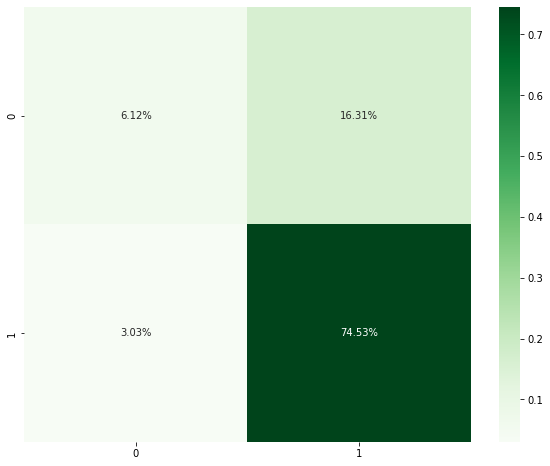

In [ ]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.893
Test F1_score for this model is :  0.8851


In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8198
Test Accuracy score for this model :  0.8065


## LinearSVC

In [ ]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegression())),
  ('classification', LinearSVC())
])
clf.fit(X_train_vec, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression())),
                ('classification', LinearSVC())])

In [ ]:
# #predicted value of y probabilities
# y_pred_train = clf.predict_proba(X_train_vec)
# y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

# fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
# fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

# train_auc = round(auc(fpr_train,tpr_train),3)
# test_auc = round(auc(fpr_test,tpr_test),3)

# plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
# plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
# plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
# plt.xlabel('False Positive Rate(FPR)')
# plt.ylabel('True Positive Rate(TPR)')
# plt.title('ROC curve')
# plt.legend()
# plt.show()
# print('Best AUC for the model is {} '.format(test_auc))

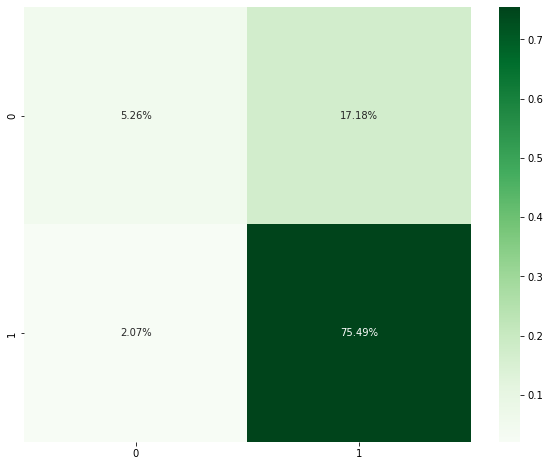

In [ ]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8866
Test F1_score for this model is :  0.8869


In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.807
Test Accuracy score for this model :  0.8075


## Resumo das metricas

DecisionTreeClassifier

- Train F1_score for this model is :  0.893
- Test F1_score for this model is :  0.8851

- Train Accuracy score for this model :  0.8198
- Test Accuracy score for this model :  0.8065

RandomForestClassifier
- Train F1_score for this model is :  0.8933
- Test F1_score for this model is :  0.8862

- Train Accuracy score for this model :  0.8198
- Test Accuracy score for this model :  0.8078

LogisticRegression

AUC. = 0.694 *melhor

- Train F1_score for this model is :  0.8867
- Test F1_score for this model is :  0.8871

- Train Accuracy score for this model :  0.8075
- Test Accuracy score for this model :  0.8081


LinearSVC
- Train F1_score for this model is :  0.8866
- Test F1_score for this model is :  0.8869

- Train Accuracy score for this model :  0.807
- Test Accuracy score for this model :  0.8075

# Tunando Hyperparametros do LogisticRegression

In [ ]:
from joblib import dump, load

#'product_name_lenght', 'product_description_lenght' adicionados ao dataset

# Funcao de preprocessamento atualizada para binarizar as variaveis target
def feat_eng(df):
  df = df.copy()
  df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date
  df['order_aproved_at'] = pd.to_datetime(df['order_aproved_at']).dt.date
  df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date
  df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.date
  df.drop(columns=['review_comment_title', 'review_comment_message', 'order_id', 'customer_city', 'customer_zip_code_prefix', 
                   'product_id', 'review_id', 'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)
  

  df = df[df["order_status"] == "delivered"]
  df = df[df["order_aproved_at"].notnull()]
  df = df[df["order_delivered_customer_date"].notnull()]

  # construcao de features
  df["dif_estimated_real"] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
  df['dif_estimated_real'] = df['dif_estimated_real'].dt.days.copy()
  df["real_delivered_time"] = (df["order_delivered_customer_date"] - df["order_aproved_at"]).dt.days
  df["estimated_delivered_time"] = (df["order_estimated_delivery_date"] - df["order_aproved_at"]).dt.days
  df["is_late"] = df['dif_estimated_real'] < 0
  df["is_late"] = df["is_late"].astype("int64")

  # linhas sem sentido
  df = df[df.real_delivered_time >= 0]
  df = df[df.estimated_delivered_time >= 0]

  # Variaveis target binarizadas, valores menor igual a 3 atribuidos ao valor 0, valores maiores que 3 atribuido ao valor 1
  df.loc[df['review_score'] <= 3 ,'review_score'] = 0
  df.loc[df['review_score'] > 3,'review_score'] = 1
    
  # load the dataset
  df = df[["customer_id",'product_name_lenght', 'product_description_lenght',"order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                 'customer_state', 'product_category_name', 'product_photos_qty', 'real_delivered_time', 
                 'estimated_delivered_time', 'dif_estimated_real', 'is_late', "review_score"]]

  # one-hot-encoding
  df = pd.get_dummies(df, columns=["customer_state", "product_category_name"] )

  return df

In [ ]:
def prep(data):
  y = data[["review_score"]]
  X = data.drop(columns=["review_score", "customer_id"])

  # split into train and test sets
  X_train_vec, X_test_vec, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  colunas = ['product_name_lenght', 'product_description_lenght',"order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                'product_photos_qty', 'real_delivered_time', 
                'estimated_delivered_time', 'dif_estimated_real', 'is_late']
  scaler = StandardScaler()
  

  X_train_vec[colunas] = scaler.fit_transform(X_train_vec[colunas])
  
  pickle.dump(scaler, open("scaler.sav", 'wb'))

  X_test_vec[colunas] = scaler.transform(X_test_vec[colunas])


  return X_train_vec, X_test_vec, y_train, y_test

In [ ]:
# X_train_vec, X_test_vec, y_train, y_test = pre_test(df_rest, scale=1)

In [ ]:
# Randomly sample 70% of your dataframe
datap = feat_eng(data)
df_sample = datap.sample(1000,random_state=0)
df_rest = datap.drop(df_sample.index)

In [ ]:
df_rest

,customer_id,product_name_lenght,product_description_lenght,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_photos_qty,real_delivered_time,estimated_delivered_time,...,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
0,297dcf281305aabfee256d313076af2b,51,625,349.90,13.84,1,1,1,5,42,...,0,0,0,0,0,0,0,0,0,0
1,b7563d94162ed0aa3f8d9cada4bcc536,44,1428,15.00,15.10,1,1,2,3,22,...,0,0,0,0,0,0,0,0,0,0
2,f102cb15ec41ca30fa2902da06495f6b,55,637,238.90,18.00,1,1,1,7,36,...,0,0,0,0,0,0,0,0,0,0
3,e33c250311160298e5b457ca52720a35,55,617,29.99,18.23,1,1,1,23,23,...,0,0,0,0,0,0,0,0,0,0
4,8a8f7c9a4450f17ba3ee25a5ba821bc7,49,558,295.99,47.65,1,1,2,9,29,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7f766d0e6f6e88fdd132d1d84567ccd8,36,450,198.00,91.98,2,1,1,7,27,...,0,0,0,0,0,0,0,0,0,0
99996,7b3f5e33cc06406a59d69da8df6494e0,26,119,59.00,11.02,1,1,1,9,19,...,0,0,0,0,0,0,0,1,0,0
99997,08e2db9881334685b0bbf25294a20a7f,42,660,119.99,18.09,1,1,1,14,25,...,0,0,0,0,0,0,0,0,0,0
99998,019bfa3baf53d66e77de2c1f26d98cdb,33,659,119.99,18.09,1,1,1,7,20,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from google.colab import files

# df_rest.to_csv("st_data.csv")
# files.download("st_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train_vec, X_test_vec, y_train, y_test = prep(df_rest)

In [ ]:
X_train_vec

,product_name_lenght,product_description_lenght,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_photos_qty,real_delivered_time,estimated_delivered_time,dif_estimated_real,...,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
98856,0.509014,-0.799370,0.233137,3.242059,1.982420,-0.200787,-0.728484,0.296350,2.228650,1.644884,...,0,0,0,0,0,0,0,0,0,0
27042,1.002426,-1.026645,-0.410379,-0.329287,-0.219523,-0.200787,2.693614,-0.019857,0.295495,0.273082,...,0,0,0,0,0,0,0,0,0,0
76961,-0.971225,0.298128,0.109899,-0.344390,-0.219523,-0.200787,3.263963,0.296350,-0.273080,-0.510805,...,0,0,0,0,0,0,0,0,0,0
88795,0.706379,-0.089136,-0.473286,-0.697799,-0.219523,1.186574,-0.728484,-1.073882,-1.069085,0.077110,...,0,1,0,0,0,0,0,0,0,0
59650,1.002426,-0.554153,-0.457302,-0.379630,-0.219523,-0.200787,0.412215,-0.230662,-0.273080,-0.020876,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22226,-2.846194,-0.138479,0.367718,1.629063,-0.219523,-0.200787,2.123264,-0.546870,-0.386795,0.175096,...,0,0,0,0,0,0,0,0,0,0
75972,-0.477812,-0.267069,-0.358815,-0.376610,-0.219523,-0.200787,2.123264,-0.652272,-0.500510,0.175096,...,0,0,0,1,0,0,0,0,0,0
51861,-0.971225,-0.299964,-0.045307,-0.603658,-0.219523,-0.200787,-0.158134,-0.757675,-1.296515,-0.412819,...,0,0,0,0,0,0,0,0,0,0
5361,-0.083082,1.924938,0.564176,-0.187319,-0.219523,-0.200787,-0.728484,0.507155,0.977785,0.371068,...,0,0,0,0,0,0,0,0,0,0


## Busca em grade para descobrir melhor combinacao de hyperparametros

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_vec[feat], y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [ ]:
grid_result.best_params_

NameError: ignored

## Logistic Regression hyperparametros tunados

In [ ]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegression())),
  ('classification', LogisticRegression(C= 10, penalty = 'l2', solver = 'liblinear'))
])
clf.fit(X_train_vec, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression())),
                ('classification',
                 LogisticRegression(C=10, solver='liblinear'))])

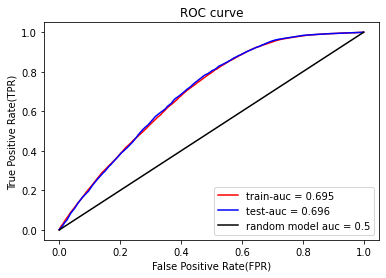

Best AUC for the model is 0.696 


In [ ]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = metrics.roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = metrics.roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

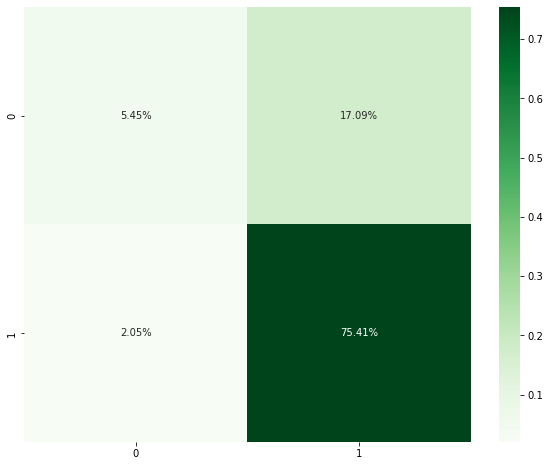

In [ ]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8866
Test F1_score for this model is :  0.8874


In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8072
Test Accuracy score for this model :  0.8086


In [ ]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_vec, y_test)
print(result)

0.8086112837511221


In [ ]:
scalerfile = 'scaler.sav'
scaler = pickle.load(open(scalerfile, 'rb'))

colunas = ['product_name_lenght', 'product_description_lenght',"order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                'product_photos_qty', 'real_delivered_time', 
                'estimated_delivered_time', 'dif_estimated_real', 'is_late']

test_scaled_set = scaler.transform(X_test_vec[colunas][:100])

In [ ]:


files.download("scaler.sav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
datalol = pd.read_csv("st_data.csv")
# datalol.drop(columns=("Unnamed: 0"))
datalol

,Unnamed: 0,customer_id,product_name_lenght,product_description_lenght,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_photos_qty,real_delivered_time,...,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
0,0,297dcf281305aabfee256d313076af2b,51,625,349.90,13.84,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
1,1,b7563d94162ed0aa3f8d9cada4bcc536,44,1428,15.00,15.10,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0
2,2,f102cb15ec41ca30fa2902da06495f6b,55,637,238.90,18.00,1,1,1,7,...,0,0,0,0,0,0,0,0,0,0
3,3,e33c250311160298e5b457ca52720a35,55,617,29.99,18.23,1,1,1,23,...,0,0,0,0,0,0,0,0,0,0
4,4,8a8f7c9a4450f17ba3ee25a5ba821bc7,49,558,295.99,47.65,1,1,2,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96533,99995,7f766d0e6f6e88fdd132d1d84567ccd8,36,450,198.00,91.98,2,1,1,7,...,0,0,0,0,0,0,0,0,0,0
96534,99996,7b3f5e33cc06406a59d69da8df6494e0,26,119,59.00,11.02,1,1,1,9,...,0,0,0,0,0,0,0,1,0,0
96535,99997,08e2db9881334685b0bbf25294a20a7f,42,660,119.99,18.09,1,1,1,14,...,0,0,0,0,0,0,0,0,0,0
96536,99998,019bfa3baf53d66e77de2c1f26d98cdb,33,659,119.99,18.09,1,1,1,7,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def prep_st(data):
  y = data[["review_score"]]
  X = data.drop(columns=("review_score"))


  colunas = ['product_name_lenght', 'product_description_lenght',"order_products_value", 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 
                'product_photos_qty', 'real_delivered_time', 
                'estimated_delivered_time', 'dif_estimated_real', 'is_late']
  scaler = pickle.load(open(scalerfile, 'rb'))

  X[colunas] = scaler.transform(X[colunas])

  return X, y

In [ ]:
X, y = prep_st(df_sample.sample(5))

In [ ]:
df_sample.reset_index(drop=True)

,customer_id,product_name_lenght,product_description_lenght,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_photos_qty,real_delivered_time,estimated_delivered_time,...,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
0,b0589a40c88f375b99931580b7f26610,55,273,134.90,18.19,1,1,1,25,21,...,0,0,0,0,0,0,0,0,0,0
1,84e0477a7f351b30ebbac43c4a7273c1,43,808,71.00,13.08,1,1,1,4,27,...,0,0,0,0,0,0,0,0,0,1
2,6ee889c3faf88ca7c847a655670e75ea,57,663,53.99,16.14,1,1,1,15,30,...,0,0,0,0,0,0,0,0,0,0
3,3569063617dc1d35e2e8c67d31dce950,41,1474,89.00,9.37,1,1,1,3,13,...,0,0,0,0,0,0,0,0,0,0
4,13bc16c60781cf63d139a14c74a631de,59,566,125.98,20.12,1,1,1,7,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,fa7633c531e928b43b8014881e8e2fa4,57,1176,59.90,32.87,1,1,1,18,34,...,0,0,0,0,0,0,0,0,0,0
996,7514285bdd26b3ce763b21bb5e51f886,48,742,64.89,13.47,1,1,4,7,16,...,0,0,0,0,0,0,0,0,0,0
997,731dc3e981e6c5c390acd0cf03ccc05e,59,235,109.90,20.01,1,1,2,11,35,...,0,0,0,0,0,0,0,0,0,0
998,1367d72e754996a2323d425be45674cb,35,353,69.90,11.99,1,1,5,8,20,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = pd.DataFrame(loaded_model.predict(X))
result[0].unique() == 1

array([ True])